# Clustering de los casos de phishing

El objetivo es tratar de crear grupos de tal manera que se puedan caracterizar.

In [7]:
from utils import wrangle_data, dummy_to_labels, SEED, silhouette_plots
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from IPython.display import display, HTML

%matplotlib inline

In [2]:
df = wrangle_data(dummy=True)

In [3]:
df = df[df['Result'] == -1]

X = np.array(df.drop(['Statistical_report', 'Result'], axis=1))
y = df['Result']

Determinamos el número de clústers óptimo mediante el coeficiente Silhouette para diversos valores de k.

For n_clusters = 2 The average silhouette_score is : 0.270742339856


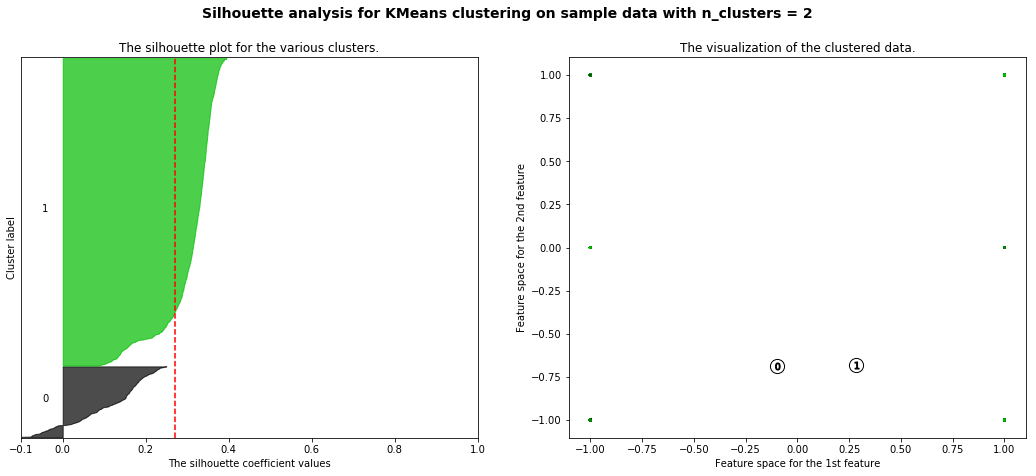

For n_clusters = 3 The average silhouette_score is : 0.119964450151


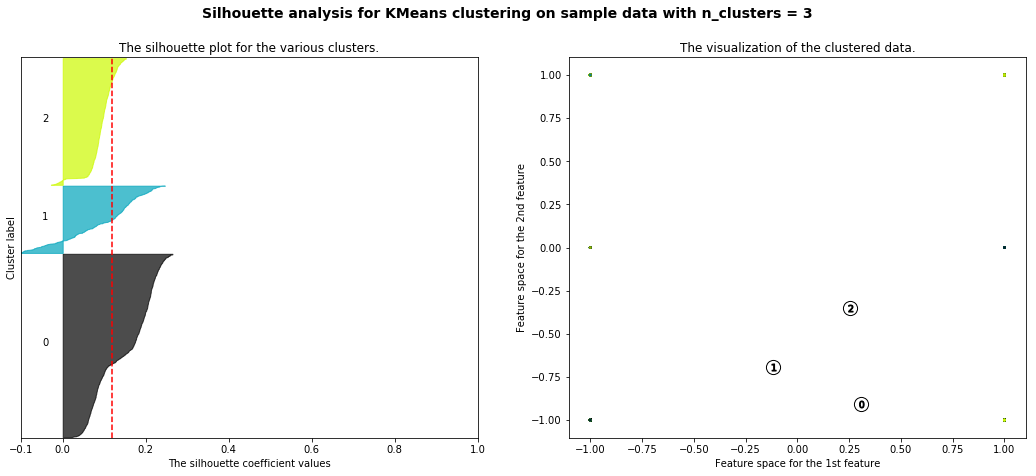

For n_clusters = 4 The average silhouette_score is : 0.12607619991


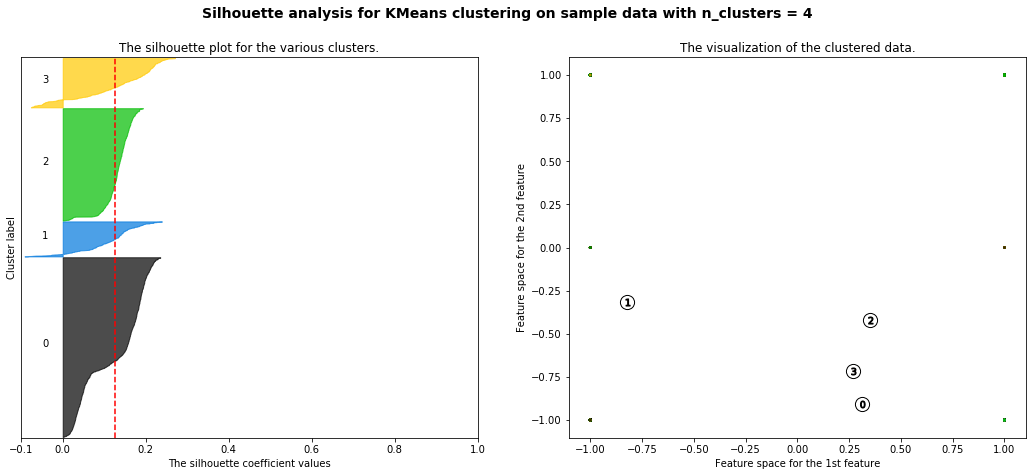

For n_clusters = 5 The average silhouette_score is : 0.114560942351


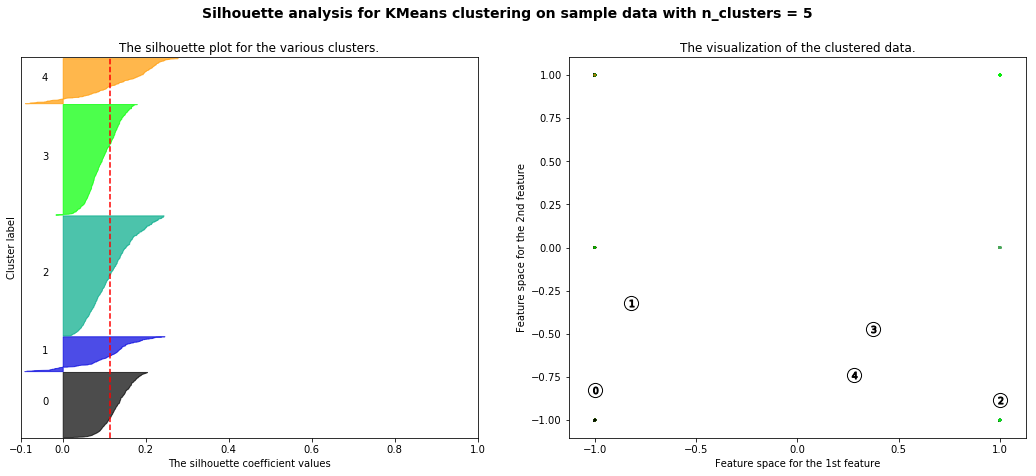

For n_clusters = 6 The average silhouette_score is : 0.120315293902


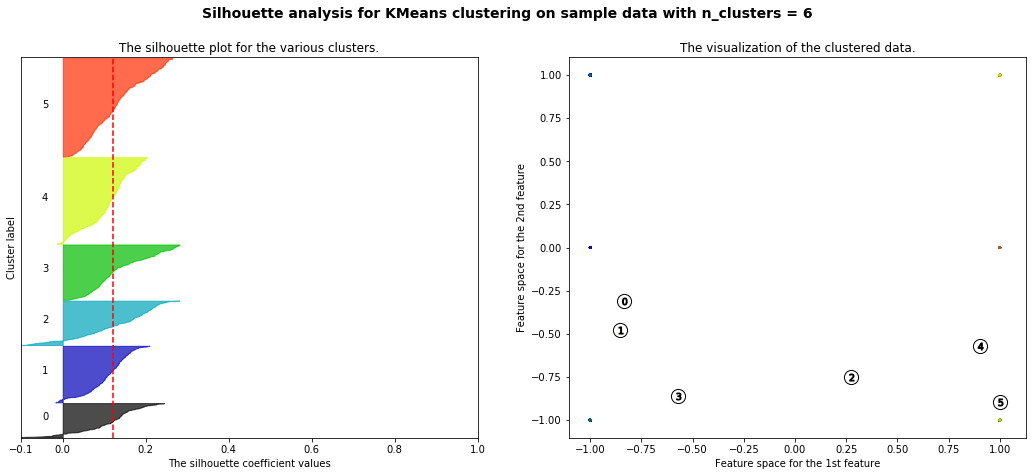

For n_clusters = 7 The average silhouette_score is : 0.115579324937


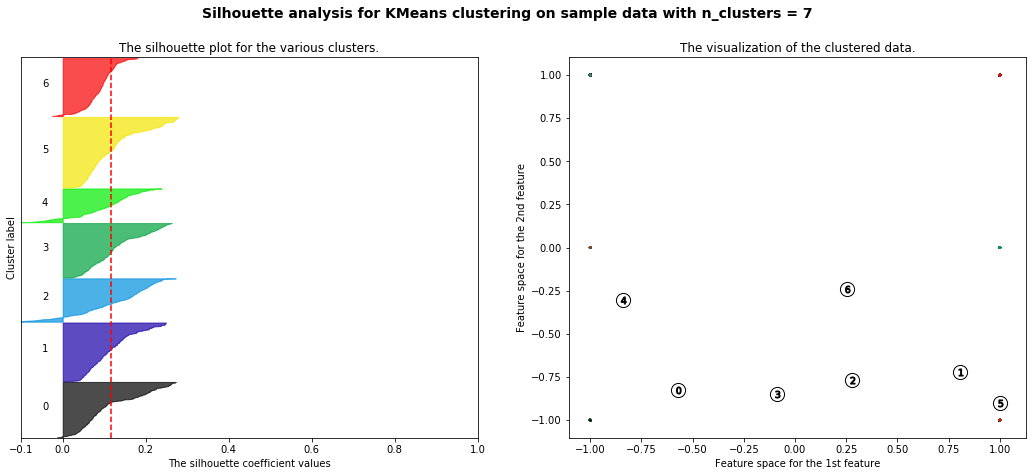

In [4]:
silhouette_plots([2, 3, 4, 5, 6, 7], X, y)

Según le diagrama y el coeficiente Silhouette, 4 parece ser el número óptimo de clústers.

In [5]:
k = 4

In [8]:
kmeans = KMeans(n_clusters=k, random_state=SEED, init='random', n_jobs=-1).fit(X)

In [9]:
df = dummy_to_labels(df, result_included=True, stat_report_included=True)

In [10]:
df['cluster'] = kmeans.predict(X)

In [11]:
with pd.option_context('display.max_columns', len(df.columns)):
    print('Cluster %i' % 0)
    display(df[df['cluster'] == 0].describe(include=['O']))

Cluster 0


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339,2339
unique,2,3,2,2,2,1,3,3,2,2,2,2,2,3,3,3,2,2,2,2,2,2,2,2,2,3,2,2,3,2,1
top,false,gt_75,false,false,false,true,one_subd,nothing,gt_1_year,same_domain,not_preferred_status,false,requestUrl%_gt_61,anchor%_gt_67,links%_gt_81,blank,other,hostname_in_url,2_or_3,no_statusbar_change,enabled,other,false,lt_6_months,found,not_in_alexa,lt_0.2,true,1_or_2,legit,phising
freq,1537,2212,2301,2108,2248,2339,1042,1552,1777,2315,2325,2213,2046,1407,1388,2121,2245,2251,2145,2326,2330,2305,2326,1358,1646,850,1875,1893,1417,2079,2339


- Request_URL: requestUrl%_lt_22
- Links_in_tags: links%_gt_81
- popUpWindow: other
- web_traffic: alexa_gt_100K

In [12]:
with pd.option_context('display.max_columns', len(df.columns)):    
    print('Cluster %i' % 1)
    display(df[df['cluster'] == 1].describe(include=['O']))

Cluster 1


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456
unique,2,3,2,2,2,1,3,3,2,2,2,2,2,3,3,3,2,2,2,2,2,2,2,2,2,3,2,2,3,2,1
top,true,gt_75,true,false,true,true,one_subd,nothing,lte_1_year,same_domain,not_preferred_status,true,requestUrl%_gt_61,anchor%_gt_67,links%_lt_17,blank,other,no_hostname_in_url,0_or_1,no_statusbar_change,enabled,yes&with_form,false,gte_6_months,not_found,alexa_lt_100K,lt_0.2,true,gt_2,legit,phising
freq,415,299,449,300,436,456,240,263,325,235,293,449,230,415,321,350,262,407,275,245,390,263,327,243,420,162,368,312,290,304,456


- Favicon: external_domain
- port: preferred_status
- Links_in_tags: links%_gte_17_lte_81
- Submitting_to_email: mail_or_mailto
- on_mouseover: statusbar_change
- popUpWindow: yes&with_form
- web_traffic: alexa_gt_100K

In [13]:
with pd.option_context('display.max_columns', len(df.columns)):    
    print('Cluster %i' % 2)
    display(df[df['cluster'] == 2].describe(include=['O']))

Cluster 2


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462,1462
unique,2,3,2,2,2,1,3,3,2,2,2,2,2,3,3,3,2,2,2,1,2,2,2,2,2,3,2,2,3,2,1
top,false,gt_75,false,false,false,true,one_subd,nothing,lte_1_year,same_domain,not_preferred_status,false,requestUrl%_lt_22,anchor%_gt_67,links%_gt_81,blank,other,hostname_in_url,2_or_3,no_statusbar_change,enabled,other,false,gte_6_months,found,alexa_gt_100K,lt_0.2,true,1_or_2,legit,phising
freq,987,1029,1437,1318,1448,1462,656,873,1441,1424,1452,1391,1431,925,708,1200,1364,1428,1375,1462,1460,1412,1460,735,1061,542,1119,1230,991,1323,1462


- Domain_registeration_length: gt_1_year
- Links_in_tags: links%_gt_81
- popUpWindow: other
- web_traffic: not_in_alexa

In [14]:
with pd.option_context('display.max_columns', len(df.columns)):    
    print('Cluster %i' % 3)
    display(df[df['cluster'] == 3].describe(include=['O']))    

Cluster 3


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641
unique,2,3,2,2,2,1,3,3,2,2,2,2,2,3,3,3,2,2,2,2,2,2,2,2,2,3,2,2,3,2,1
top,false,gt_75,false,false,false,true,one_subd,nothing,lte_1_year,external_domain,preferred_status,false,requestUrl%_gt_61,anchor%_gt_67,links%_gte_17_lte_81,blank,mail_or_mailto,hostname_in_url,2_or_3,statusbar_change,enabled,yes&with_form,false,lt_6_months,found,alexa_gt_100K,lt_0.2,true,1_or_2,legit,phising
freq,407,539,639,335,620,641,314,363,362,626,547,572,368,499,339,567,545,566,595,433,493,600,342,334,437,283,523,536,385,353,641


- having_IP_Address: true
- Shortining_Serice: true
- double_slash_redirecting: true
- HTTPS_token: true
- Links_in_tags: links%_lt_17
- Abnormal_URL: no_hostname_in_url
- Redirect: 0_or_1
- popUpWindow: yes&with_form
- age_of_domain: gte_6_months
- DNSRecord: not_found
- web_traffic: alexa_lt_100K
- Links_pointing_to_page: gt_2